In [79]:
# Importing the pandas library as pd and reading a CSV file containing mushroom data from a URL
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ckulkarni13/Data_Science_Methods_Tools/main/mushroom_cleaned.csv")

In [80]:
# Provides a summary of DataFrame 'df', including the number of non-null values and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [81]:
# Provides a summary of DataFrame 'df', including the number of non-null values and data types for each column
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
# Iterates through a list of column names 'cols' and prints the unique values in each column of the DataFrame 'df'
cols = ["cap-shape", "gill-attachment", "gill-color", "stem-color", "class"]
for col in cols:
    print(f"{col} data has :", df[col].unique())

cap-shape data has : [2 6 4 0 1 5 3]
gill-attachment data has : [2 0 1 5 6 4 3]
gill-color data has : [10  5  7  9  0  3 11  8  1  6  4  2]
stem-color data has : [11 12  6 10  0  5  9  8  1  4  3  7  2]
class data has : [1 0]


# Exploratory Data Analysis

In [ ]:
# Importing necessary libraries: 'warnings' to suppress warnings, 'matplotlib.pyplot' for plotting, 'seaborn' for statistical data visualization,
# and 'plotly.express' for interactive visualizations
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

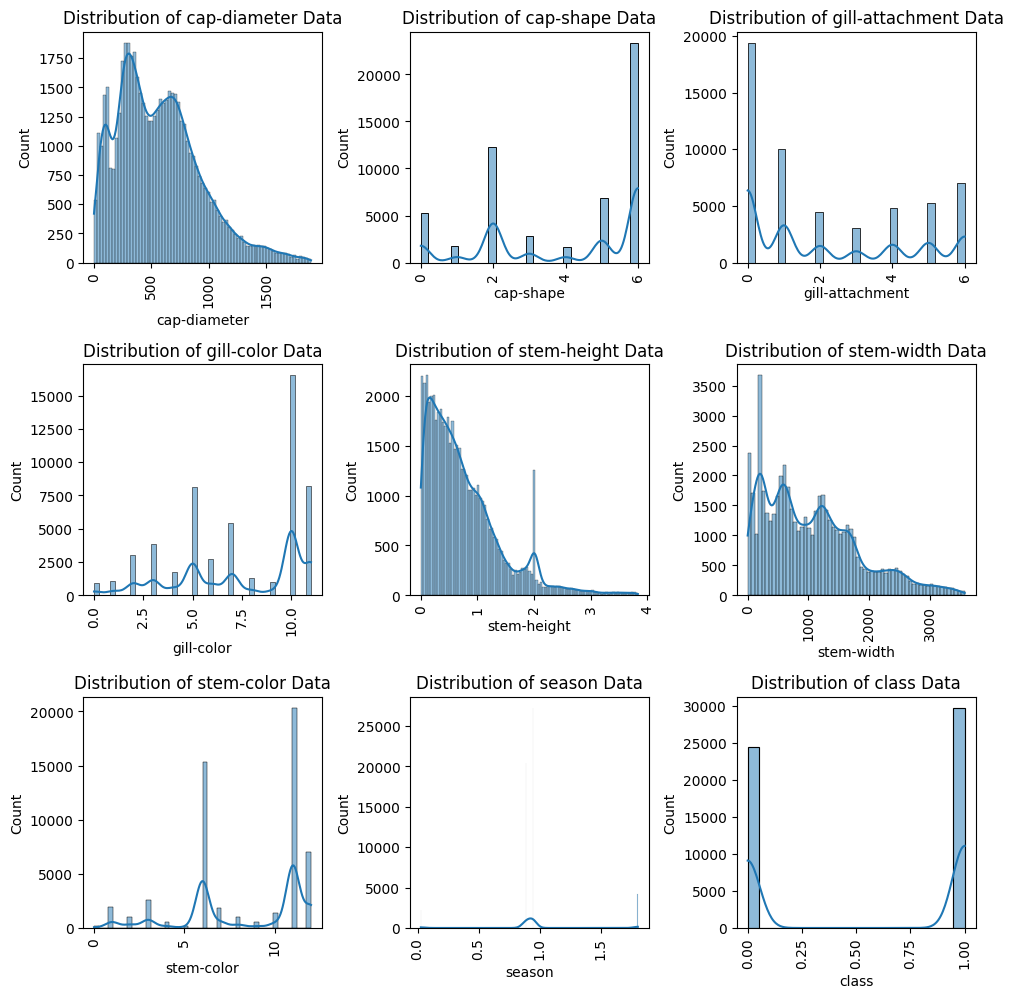

In [ ]:
plt.figure(figsize = (10, 10))
for i, col in enumerate(df.columns[:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(x = df[col], kde = True, multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

- Cap Diameter: The distribution is skewed to the right, with the majority of counts falling below 500 units, indicating that smaller cap diameters are more common.
- Cap Shape: The data is categorical, with certain categories (likely represented by specific numbers on the x-axis) showing higher counts than others, suggesting some cap shapes are more prevalent.
- Gill Attachment: This is another categorical distribution where two particular categories significantly outnumber the others, indicating these types of gill attachments are much more common.
- Gill Color: Displays a multi-modal distribution with certain colors (represented by numbers) being more common than others.
- Stem Height: The histogram shows a right-skewed distribution with a tail extending to the right, suggesting that there are some instances of much taller stems, but they are rare.
- Stem Width: A somewhat normal distribution with a peak at the lower end, indicating that narrower stems are most common, but with a wide variation overall.
- Stem Color: Categorical distribution, similar to gill color, with certain stem colors being predominant.
- Season: Another categorical distribution, with one season (represented by a specific number) clearly more common than others, possibly indicating a seasonality to the data being represented.
- Class: This appears to be a binary categorical distribution with one class significantly outnumbering the other, suggesting a class imbalance in the dataset.

### Cap-dia. of mushrooms are distributed btw 0 ~ 1000.
### Stems' height are usually below 1 and width range is 0 ~ 1500 most.
### Number of ediatable mushrooms are slightly more than one of non-editable.

In [ ]:
fig1 = px.sunburst(df, path = ["class", "cap-shape"])
fig1.update_traces(textinfo = "label + percent parent")
fig1.update_layout(title_text = "Mushroom's Class by Cap Shape",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                  width = 500, height = 500)
fig1.show()

- Class Distribution: The chart is divided into two main colors, indicating two different classes of mushrooms, each occupying roughly half of the chart.
- Cap Shape 0 and 3: Cap shape category 0 is the most common for the class represented in red, and cap shape category 3 is the least common for the same class.
- Cap Shape 2 and 5: For the class in blue, cap shape category 2 is less prevalent than cap shape 5.
- Dominant Cap Shapes: Cap shape categories 5 and 6 are dominant for the blue class, while the red class is most frequently associated with cap shape category 0.

### Whethere editable or not, Cap shape "6" is most and then "2" secondly.

In [ ]:
fig2 = px.sunburst(df, path = ["class", "gill-attachment"])
fig2.update_traces(textinfo = "label + percent parent")
fig2.update_layout(title_text = "Mushroom's Class by Gill Attachment",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                  width = 500, height = 500)
fig2.show()

- Two Classes: As with the previous charts, two classes are shown, with red again representing about half of the data, which is consistent with the previous observations suggesting a balanced dataset.
- Gill Attachment 0: In both classes, gill attachment category 0 is quite prevalent, though it's slightly more common in the blue class.
- Gill Attachment 1: Category 1 is the next most common gill attachment for both classes, with the red class showing a slightly higher proportion.
- Less Common Categories: Categories 4 and 5 have a lower representation in the dataset, suggesting these types of gill attachment are less common among these mushrooms.

### Whethere editable or not, No Gill Attachment is most and then one gill secondly.

In [ ]:
fig3 = px.sunburst(df, path = ["class", "stem-color"])
fig3.update_traces(textinfo = "label + percent parent")
fig3.update_layout(title_text = "Mushroom's Class by Stem Color",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                  width = 500, height = 500)
fig3.show()

- Class Balance: Similar to the previous cap shape chart, the two classes are almost equally represented, with the class in red occupying slightly more than half of the chart.
- Dominant Stem Colors for Red Class: In the red class, the most common stem color is category 0, followed by 6, and the least common is 12.
- Dominant Stem Colors for Blue Class: For the blue class, stem color category 6 is the most common, followed closely by category 11, with category 12 being relatively less common.
- Stem Color Diversity: The chart shows a greater diversity of stem colors within each class compared to cap shapes, indicating a more varied distribution.

### It seems that we can not discriminate mushroom which it is editable or not.

In [ ]:
# Correlation of Class
df_corr = df.corr()
df_corr["class"].sort_values(ascending = False)

class              1.000000
stem-height        0.183354
gill-attachment   -0.052541
gill-color        -0.063947
season            -0.082919
stem-color        -0.128339
cap-shape         -0.133338
cap-diameter      -0.165676
stem-width        -0.182856
Name: class, dtype: float64

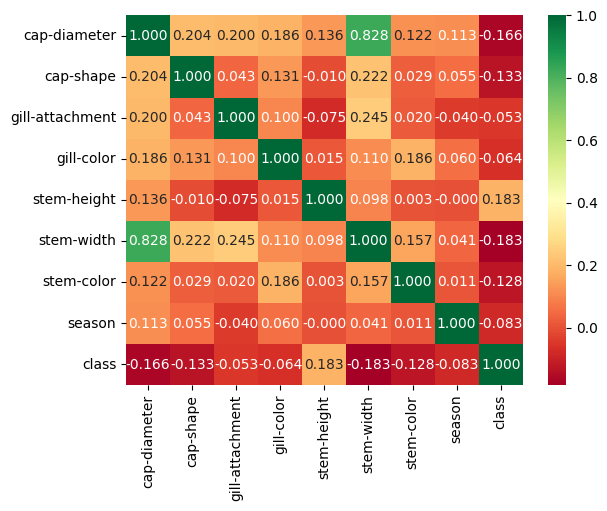

In [84]:
# Heatmap - For Correlation btw features
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_corr, fmt=".3f", annot=True, cmap="RdYlGn")
plt.show()

- Cap Diameter and Stem Width: There is a strong positive correlation (0.822) between cap diameter and stem width, indicating that mushrooms with larger cap diameters tend to have wider stems.
- Self-Correlation: Each feature has a perfect positive correlation (1.000) with itself, which is standard for correlation matrices and is represented by the diagonal green line from top left to bottom right.
- Gill Attachment and Class: There's a somewhat negative correlation (-0.200) between gill attachment and class, suggesting that the type of gill attachment might be slightly indicative of the mushroom's class.
- Season and Other Features: Season appears to have very little to no correlation with other features, with all coefficients close to zero, suggesting that the time of year has little influence on these physical characteristics.

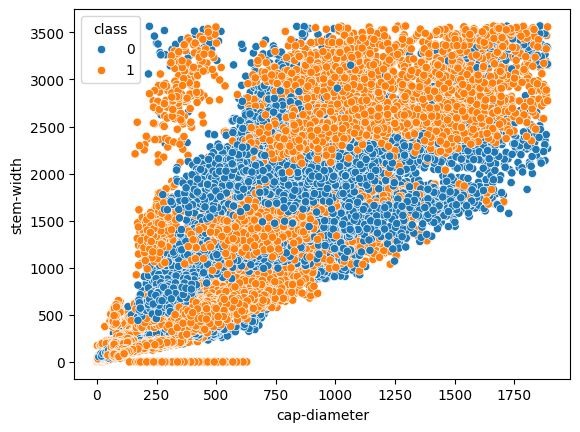

In [ ]:
sns.scatterplot(x = df["cap-diameter"], y = df["stem-width"], hue = df["class"])
plt.show()

### We guess that two parameters are nearly in proportion, but it is difficult to discriminate about editable or not.

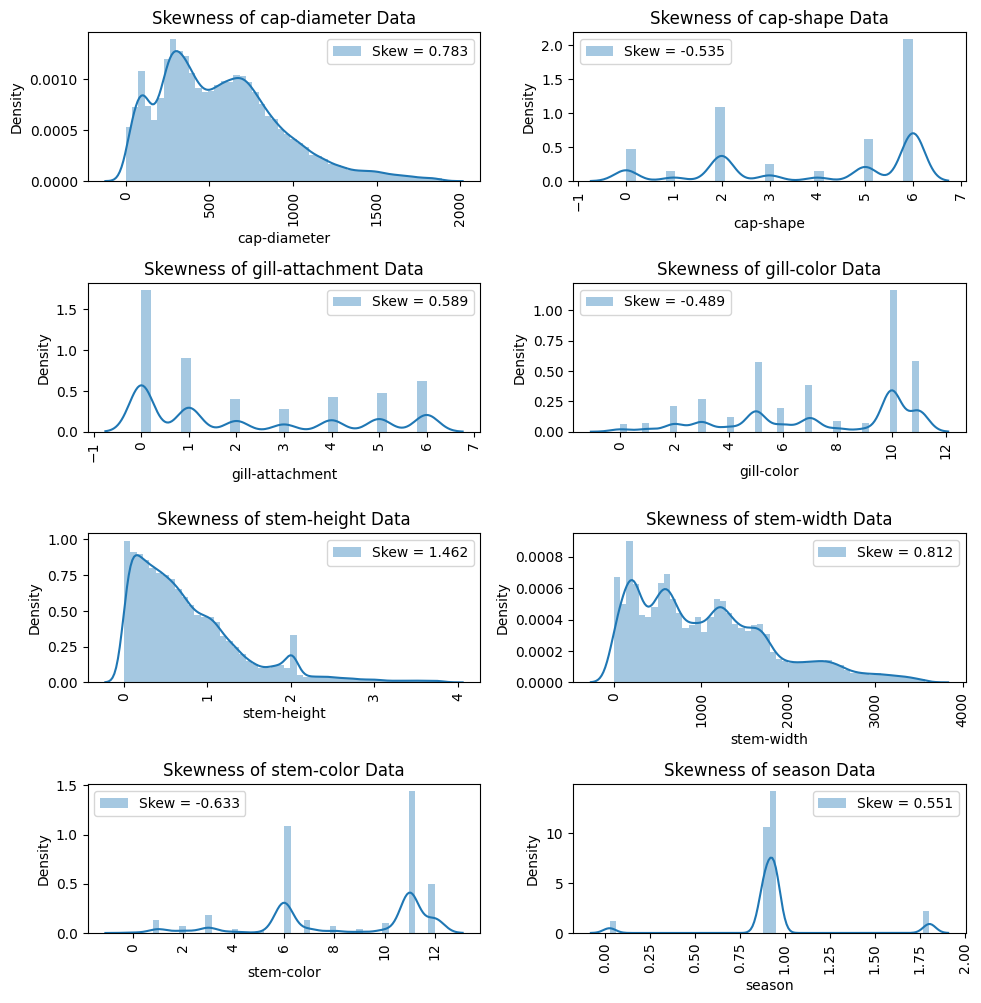

In [ ]:
# Check Skewness of all feature
plt.figure(figsize = (10, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 2, i)
    skewness = df[col].skew()
    sns.distplot(df[col], kde = True, label = "Skew = %.3f" %(skewness))
    plt.title(f"Skewness of {col} Data")
    plt.tight_layout()
    plt.legend(loc = "best")
    plt.xticks(rotation = 90)
    plt.plot()

### They do not have many outliers, so we do not need tor remove them.

# Preprocessing

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Machine Learning - Classification of Class

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def accuracy(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)

    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)

    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)

    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)

    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)

    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)

    return accuracy_score(y_test, y_reg), accuracy_score(y_test, y_svc), accuracy_score(y_test, y_dtc), accuracy_score(y_test, y_rfc), accuracy_score(y_test, y_gbc), accuracy_score(y_test, y_abc), accuracy_score(y_test, y_knc)

In [ ]:
def precision(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)

    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)

    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)

    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)

    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)

    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)

    return precision_score(y_test, y_reg), precision_score(y_test, y_svc), precision_score(y_test, y_dtc), precision_score(y_test, y_rfc), precision_score(y_test, y_gbc), precision_score(y_test, y_abc), precision_score(y_test, y_knc)

In [ ]:
def recall(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)

    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)

    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)

    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)

    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)

    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)

    return recall_score(y_test, y_reg), recall_score(y_test, y_svc), recall_score(y_test, y_dtc), recall_score(y_test, y_rfc), recall_score(y_test, y_gbc), recall_score(y_test, y_abc), recall_score(y_test, y_knc)

In [ ]:
def f1(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)

    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)

    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)

    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)

    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)

    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)

    return f1_score(y_test, y_reg), f1_score(y_test, y_svc), f1_score(y_test, y_dtc), f1_score(y_test, y_rfc), f1_score(y_test, y_gbc), f1_score(y_test, y_abc), f1_score(y_test, y_knc)

In [ ]:
# The `classifier_scores` DataFrame provides a concise comparison of several classifiers
# using the metrics of Accuracy (ACC), Precision (PREC), Recall (REC), and F1 Score (F1).
# This allows for an at-a-glance evaluation of model performance to inform decision-making on
# the most effective algorithm for our classification task.
scores = pd.DataFrame(columns = ["REG", "SVC", "DTC", "RFC", "GBC", "ABC", "KNC"],
                     index = ["ACC", "PREC", "REC", "F1"])
acc = [reg, svc, dtc, rfc, gbc, abc, knc] = accuracy(X_train, X_test, y_train, y_test)
scores.iloc[0, :] = acc
prec = [reg, svc, dtc, rfc, gbc, abc, knc] = precision(X_train, X_test, y_train, y_test)
scores.iloc[1, :] = prec
rec = [reg, svc, dtc, rfc, gbc, abc, knc] = recall(X_train, X_test, y_train, y_test)
scores.iloc[2, :] = rec
f_1 = [reg, svc, dtc, rfc, gbc, abc, knc] = f1(X_train, X_test, y_train, y_test)
scores.iloc[3, :] = f_1
scores

,REG,SVC,DTC,RFC,GBC,ABC,KNC
ACC,0.640511,0.905709,0.976497,0.990747,0.876191,0.763487,0.987786
PREC,0.657178,0.9185,0.978914,0.990571,0.892576,0.77549,0.986242
REC,0.720479,0.908738,0.97942,0.99224,0.880229,0.800607,0.991565
F1,0.687374,0.913593,0.979075,0.99132,0.88636,0.787849,0.988896


### RandomForestClassifier has highest score in seven models.